In [1]:
import pandas as pd


In [138]:
#features are for 
features = pd.read_csv('frame.gzip',compression='gzip')
cordf = pd.read_csv('cordf.gzip',compression='gzip')

In [176]:

ufeatures = features.drop(columns=['Unnamed: 0','year_of_death','place_of_death'])
x = ufeatures.drop(columns=['life-span'])
y =ufeatures['life-span']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


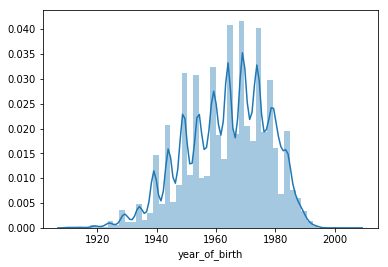

In [116]:
import seaborn as sns
sns.distplot(features['year_of_birth'])

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.20, random_state=20)

In [142]:
import keras

In [143]:
xtr.head(2)

,state,rural,treatment_source,diagnosed_for,is_car,year_of_birth,highest_qualification,occupation_status,disability_status,diagnosed_for.1,chew,smoke,alcohol,wt,sex
408095,5,2.0,9.0,0.0,2.0,1965.0,1.0,4.0,0.0,0.0,2.0,1.0,3.0,3.03,1.0
211755,20,2.0,8.0,0.0,2.0,1977.0,4.0,4.0,0.0,0.0,2.0,4.0,4.0,17.50,1.0


In [77]:
#pd.get_dummies()

In [ ]:
#try preprocessing

In [97]:
from sklearn import preprocessing

In [209]:
scalarx = preprocessing.StandardScaler()
scalary = preprocessing.StandardScaler()
sx = scalarx.fit_transform(x)
sy = scalary.fit_transform(np.array(y).reshape(-1, 1))

In [210]:
# sx = scaled_features[:,:15]
# sy = scaled_features[:,15:]
# sxtr,sxte,sytr,syte = train_test_split(sx,sy,test_size=0.20, random_state=20)

In [178]:
#trails for column or not
# t = np.array([[2,0,1500],[3,-5,8000],[6,0.21,2000]])
# sca = preprocessing.StandardScaler()
# sca.fit_transform(t)

In [219]:
sxtr = sx[:380000]
sxte = sx[380000:]
sytr = sy[:380000]
syte = sy[380000:]

In [215]:
from keras.models import Sequential
from keras.layers import Dense
import numpy


In [216]:
# model = Sequential()
# model.add(Dense(12, input_dim=8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [224]:
import tensorflow as tf
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_dim=15),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                1024      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [225]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print(epoch, end='')

EPOCHS = 500
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)
# Store training stats
history = model.fit(sxtr, sytr, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop,PrintDot()])


0123456789
10111213141516171819
20212223242526272829
30313233343536373839
40414243444546474849
50515253545556575859
60616263646566676869
70717273747576777879
80818283848586878889
90919293949596979899
100101102103104105106107108109
110111112113114115116117118119
120121122123124125126127128129
130131132133134135136137138139
140141142143144145146147148149
150151152153154155156157158159
160161

In [244]:
model.save('model_fin.h5')

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:139: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [226]:
model.evaluate(x=sxte, y=syte)

51026/51026 [==============================] - 1s 17us/step


[0.010075242978354635, 0.08570984835120159]

In [241]:
scalary.inverse_transform([0.20])

array([48.03235154])

In [242]:
predicted = scalary.inverse_transform(model.predict(sxte))
ytrue = scalary.inverse_transform(syte)

In [243]:
error = 0
for i in range(51026):
    error = error + abs(predicted[i] - ytrue[i])
error/51026 

array([1.19778489])

In [87]:
pre = model.predict(xte)

In [88]:
pred =[]
for i in pre:
    pred.append(i[0])

In [89]:
pli = [5,1,]

In [93]:
error = 0
for i in range(86206):
    error = error + abs(npred[i] - nyte[i])
error/86206    
# np.mean(npred == nyte)

7.516227191665473

In [92]:
npred = np.array(pred)
nyte = np.array(yte)


In [57]:
keras.metrics.categorical_accuracy(nyte, npred)

<tf.Tensor 'Cast_1:0' shape=() dtype=float32>

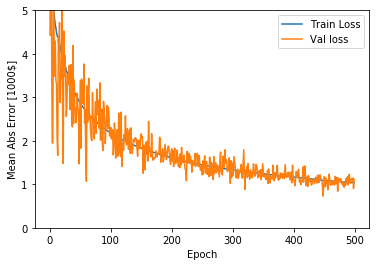

In [17]:
import numpy as np
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)